In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_formats = ['svg']

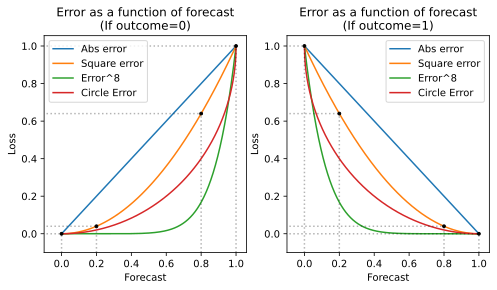

In [2]:
def circle_error(outcome, predicted):
    return 1-(1-(predicted-outcome)**2)**(1/2)

def error(outcome, predicted, exponent):
    return abs(outcome-predicted)**exponent

x = np.linspace(0, 1, 1000)
fig, axarr = plt.subplots(1, 2, figsize=(8, 4))
for ax, outcome in zip(axarr, [0, 1]):
    ax.plot(x, error(outcome, x, 1), label='Abs error');
    ax.plot(x, error(outcome, x, 2), label='Square error');
    ax.plot(x, error(outcome, x, 8), label='Error^8');
    ax.plot(x, circle_error(outcome, x), label='Circle Error');
    ax.set_xlabel('Forecast')
    ax.set_ylabel('Loss');
    ax.legend();
    ax.set_title(f'Error as a function of forecast\n(If outcome={outcome})');
    for point in [(0.2, error(outcome, 0.2, 2)), (0.8, error(outcome, 0.8, 2)), 
                  (0, error(outcome, 0, 2)), (1, error(outcome, 1, 2))]:
        ax.plot([-0.2, point[0]], [point[1], point[1]], ':', color='black', alpha=0.3);
        ax.plot([point[0], point[0]], [-0.1, point[1]], ':', color='black', alpha=0.3)
        ax.scatter(point[0], point[1], color='black', zorder=3, s=8)
    ax.set_xlim(-0.1)
    ax.set_ylim(-0.1);

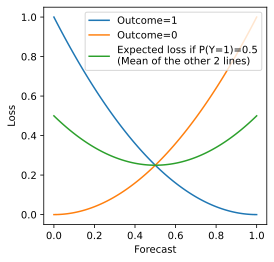

In [3]:
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, (1-x)**2, label='Outcome=1')
ax.plot(x, (0-x)**2, label='Outcome=0');
ax.plot(x, ((0-x)**2+(1-x)**2)/2, label='Expected loss if P(Y=1)=0.5\n(Mean of the other 2 lines)')
ax.set_xlabel('Forecast')
ax.set_ylabel('Loss');
ax.legend();

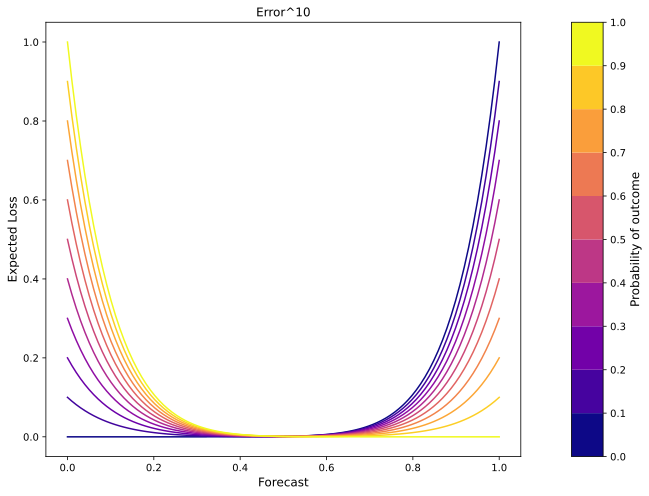

In [4]:
x = np.linspace(0, 1, 100)
probs = np.arange(0, 1.1 , 0.1)
exponent = 10

cmap = matplotlib.cm.get_cmap('plasma')

fig, axarr = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [15, 1]})
ax = axarr[0]
for prob in probs:
    ax.plot(x, error(0, x, exponent)*(1-prob)+error(1, x, exponent)*prob, color=cmap(prob))#, color='black' if abs(prob - 0.5) > 0.01 else 'red', alpha=(prob+0.1)*0.9);
ax.set_xlabel('Forecast', size=12)
ax.set_ylabel('Expected Loss', size=12);
cb1 = matplotlib.colorbar.ColorbarBase(axarr[1], norm=matplotlib.colors.BoundaryNorm(probs, cmap.N), cmap=cmap, ticks=probs)
axarr[1].set_ylabel('Probability of outcome', size=12);
ax.set_title(f'Error^{exponent}');

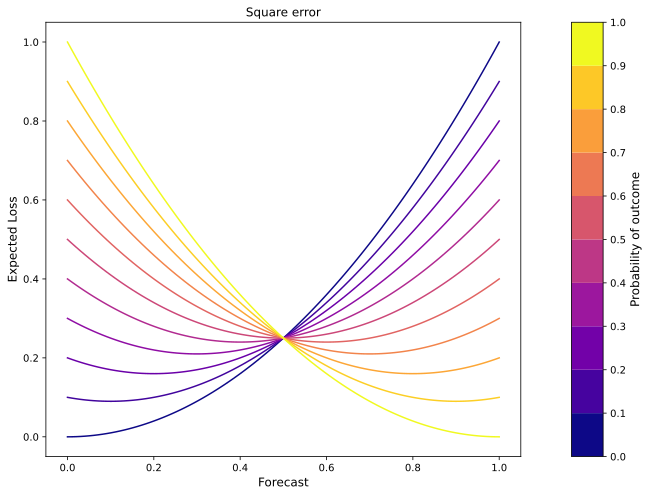

In [5]:
x = np.linspace(0, 1, 100)
probs = np.arange(0, 1.1 , 0.1)

cmap = matplotlib.cm.get_cmap('plasma')

fig, axarr = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [15, 1]})
ax = axarr[0]
for prob in probs:
    ax.plot(x, error(0, x, 2)*(1-prob)+error(1, x, 2)*prob, color=cmap(prob))#, color='black' if abs(prob - 0.5) > 0.01 else 'red', alpha=(prob+0.1)*0.9);
ax.set_xlabel('Forecast', size=12)
ax.set_ylabel('Expected Loss', size=12);
cb1 = matplotlib.colorbar.ColorbarBase(axarr[1], norm=matplotlib.colors.BoundaryNorm(probs, cmap.N), cmap=cmap, ticks=probs)
axarr[1].set_ylabel('Probability of outcome', size=12);
ax.set_title('Square error');

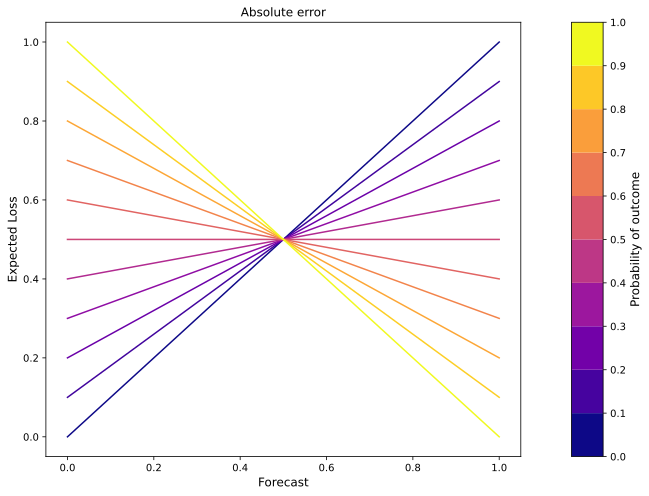

In [6]:
x = np.linspace(0, 1, 100)
probs = np.arange(0, 1.1 , 0.1)

cmap = matplotlib.cm.get_cmap('plasma')

fig, axarr = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [15, 1]})
ax = axarr[0]
for prob in probs:
    ax.plot(x, error(0, x, 1)*(1-prob)+error(1, x, 1)*prob, color=cmap(prob))#, color='black' if abs(prob - 0.5) > 0.01 else 'red', alpha=(prob+0.1)*0.9);
ax.set_xlabel('Forecast', size=12)
ax.set_ylabel('Expected Loss', size=12);
cb1 = matplotlib.colorbar.ColorbarBase(axarr[1], norm=matplotlib.colors.BoundaryNorm(probs, cmap.N), cmap=cmap, ticks=probs)
axarr[1].set_ylabel('Probability of outcome', size=12);
ax.set_title('Absolute error');

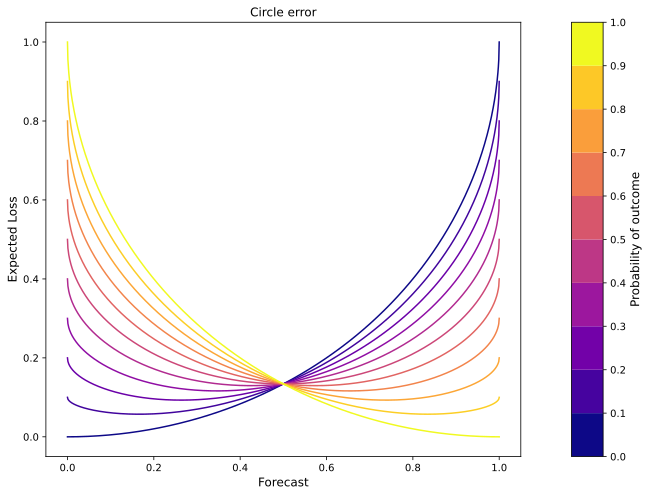

In [7]:
x = np.linspace(0, 1, 1000)
probs = np.arange(0, 11 , 1)/10

cmap = matplotlib.cm.get_cmap('plasma')

fig, axarr = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [15, 1]})
ax = axarr[0]
for prob in probs:
    ax.plot(x, circle_error(0, x)*(1-prob)+circle_error(1, x)*prob, color=cmap(prob))#, color='black' if abs(prob - 0.5) > 0.01 else 'red', alpha=(prob+0.1)*0.9);
ax.set_xlabel('Forecast', size=12)
ax.set_ylabel('Expected Loss', size=12);
cb1 = matplotlib.colorbar.ColorbarBase(axarr[1], norm=matplotlib.colors.BoundaryNorm(probs, cmap.N), cmap=cmap, ticks=probs)
axarr[1].set_ylabel('Probability of outcome', size=12);
ax.set_title('Circle error');